In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy import sparse

In [2]:
data = pd.read_csv("D:/task3.csv", delimiter=';', encoding='cp1251')

Построим проекции по всем осям данных

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001748C642390>,
      dtype=object)

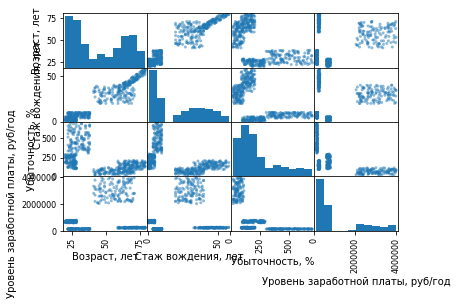

In [3]:
scatter_matrix(data)

Признаки "возраст" и "стаж вождения" сильно кореллированы и на прокециях с другими признаками дают сильно похожие матрицы разброса данных. Значит их можно рассматривать как один признак (например, стаж).

Проанализировав построенную матрицу разброса можно утверждать, что для нашей выборки можно с высокой степенью точности посчитать наиболее удачное количество итоговых кластеров. Однако это скорее частный случай, который мы имеем в следствие достаточно хорошо разделимой выборки и небольной степени размерности признаков. 

Рассмотрим более общий случай, когда мы не можем качественно оценить число итоговых кластеров. Тогда лучшим выбором в качестве метода кластеризации представляется DBSCAN, который достаточно хорошо работает когда у нас небольшая выборка, и предположительно, небольшое количество кластеров различной формы.

Для начала необходимо отмасштабировать данные:

In [4]:
from sklearn.preprocessing import MaxAbsScaler
keys = [x for x in data.keys()][1:]

In [5]:
maxabs_scaler = MaxAbsScaler()
scaled_features = maxabs_scaler.fit_transform(data[keys])

Применим DBSCAN:

In [6]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
dbscan = DBSCAN(eps=0.13, min_samples=5)
dbscan_preds = dbscan.fit_predict(scaled_features)

In [7]:
np.unique(dbscan_preds)

array([0, 1, 2, 3], dtype=int64)

In [8]:
dbscan_clusters = []
for lbl in np.unique(dbscan_preds):
    indices = [i for i, x in enumerate(dbscan_preds) if x == lbl]
    dbscan_clusters.append(indices)

In [9]:
for i in dbscan_clusters:
    print(len(i))

121
121
121
121


In [24]:
for cluster in dbscan_clusters:
    print(data.loc[cluster].mean())

Возраст, лет                             24.504132
Стаж вождения, лет                        2.586777
Убыточность, %                          203.024793
Уровень заработной платы, руб/год    700447.280992
dtype: float64
Возраст, лет                             69.851240
Стаж вождения, лет                       45.826446
Убыточность, %                          152.380165
Уровень заработной платы, руб/год    242958.446281
dtype: float64
Возраст, лет                             30.107438
Стаж вождения, лет                        7.322314
Убыточность, %                          487.140496
Уровень заработной платы, руб/год    149461.619835
dtype: float64
Возраст, лет                         5.681818e+01
Стаж вождения, лет                   2.993388e+01
Убыточность, %                       6.575207e+01
Уровень заработной платы, руб/год    2.978736e+06
dtype: float64


In [11]:
from sklearn.cluster.hierarchical import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4, linkage='average', affinity='manhattan')
aggl_preds = model.fit_predict(scaled_features)

In [12]:
clusters_aggl = []
for lbl in np.unique(aggl_preds):
    indices = [i for i, x in enumerate(aggl_preds) if x == lbl]
    clusters_aggl.append(indices)

In [25]:
for cluster in clusters_aggl:
    print(data.loc[cluster].mean())

Возраст, лет                         5.681818e+01
Стаж вождения, лет                   2.993388e+01
Убыточность, %                       6.575207e+01
Уровень заработной платы, руб/год    2.978736e+06
dtype: float64
Возраст, лет                             30.107438
Стаж вождения, лет                        7.322314
Убыточность, %                          487.140496
Уровень заработной платы, руб/год    149461.619835
dtype: float64
Возраст, лет                             69.851240
Стаж вождения, лет                       45.826446
Убыточность, %                          152.380165
Уровень заработной платы, руб/год    242958.446281
dtype: float64
Возраст, лет                             24.504132
Стаж вождения, лет                        2.586777
Убыточность, %                          203.024793
Уровень заработной платы, руб/год    700447.280992
dtype: float64


Попробуем алгоритм k-means:

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=22)

In [16]:
kmeans_preds = kmeans.fit_predict(scaled_features)

In [18]:
clusters_kmeans = []
km_labels=np.unique(kmeans_preds)
print(km_labels)
for lbl in km_labels:
    indices = [i for i, x in enumerate(kmeans_preds) if x == lbl]
    clusters_kmeans.append(indices)

[0 1 2 3]


In [27]:
for cluster in clusters_kmeans:
    print(data.loc[cluster].mean())

Возраст, лет                             24.536585
Стаж вождения, лет                        2.617886
Убыточность, %                          204.926829
Уровень заработной платы, руб/год    691354.788618
dtype: float64
Возраст, лет                             69.851240
Стаж вождения, лет                       45.826446
Убыточность, %                          152.380165
Уровень заработной платы, руб/год    242958.446281
dtype: float64
Возраст, лет                         5.681818e+01
Стаж вождения, лет                   2.993388e+01
Убыточность, %                       6.575207e+01
Уровень заработной платы, руб/год    2.978736e+06
dtype: float64
Возраст, лет                             30.168067
Стаж вождения, лет                        7.369748
Убыточность, %                          489.949580
Уровень заработной платы, руб/год    149599.478992
dtype: float64
